<a href="https://www.kaggle.com/code/jorgeluiscruzquispe/bibliometric-test-hydrology?scriptVersionId=181777257" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
!pip install -q litstudy

In [2]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbs
import litstudy

In [17]:
doc1 = litstudy.load_ieee_csv("/kaggle/input/hydrology-ieee/export2024.06.05-14.55.32.csv")

doc2 = litstudy.load_ieee_csv("/kaggle/input/hydrology-ieee/export2024.06.05-14.55.54.csv")

docs = doc1 | doc2

In [18]:
scopus = litstudy.load_bibtex("/kaggle/input/scopus-hidro/scopus.bib")

In [22]:
litstudy.plot_word_distribution(scopus)

AttributeError: 'DocumentSet' object has no attribute 'frequencies'

In [ ]:
litstudy.load_scopus_csv

In [4]:
docs_2000 = docs.filter_docs(lambda d: d.publication_year >= 2000)

In [5]:
print(len(docs_2000), "papers")

843 papers


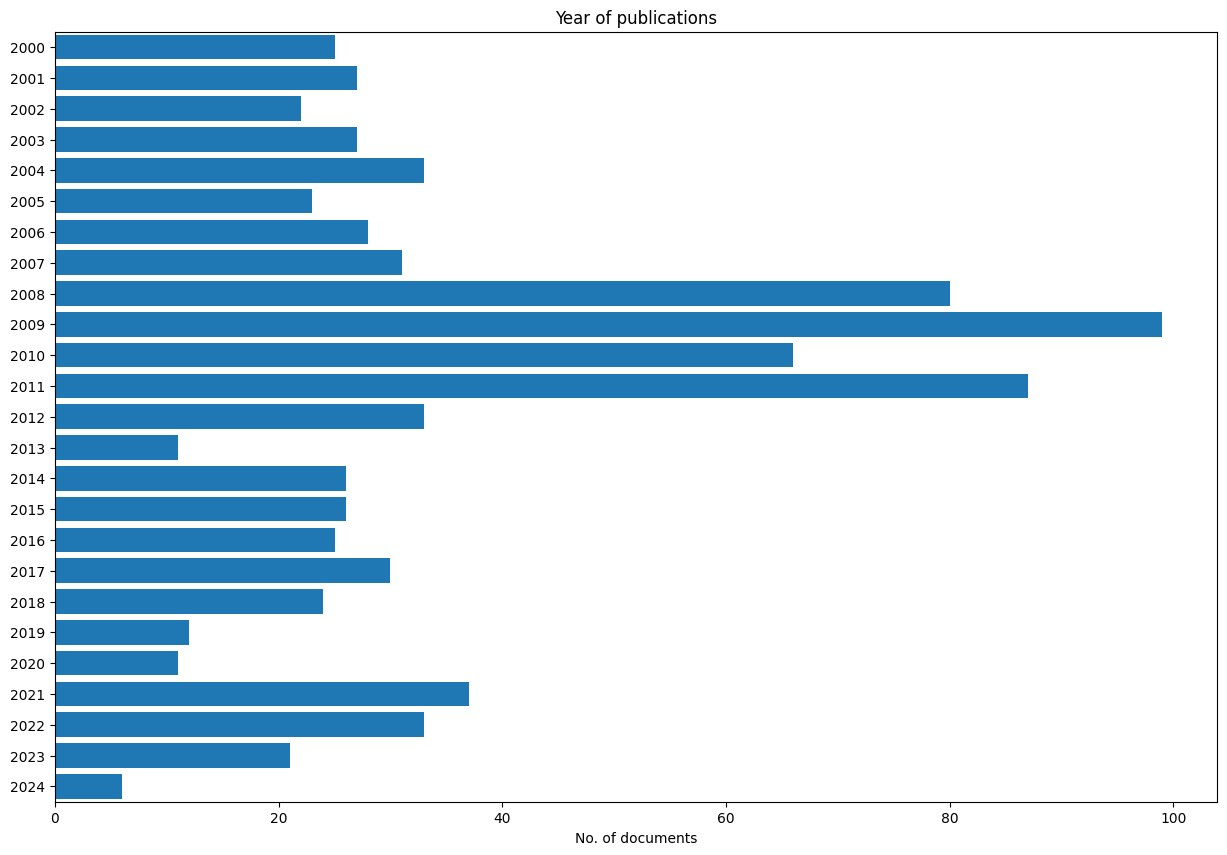

In [6]:
plt.figure(figsize = (15, 10))
litstudy.plot_year_histogram(docs_2000);

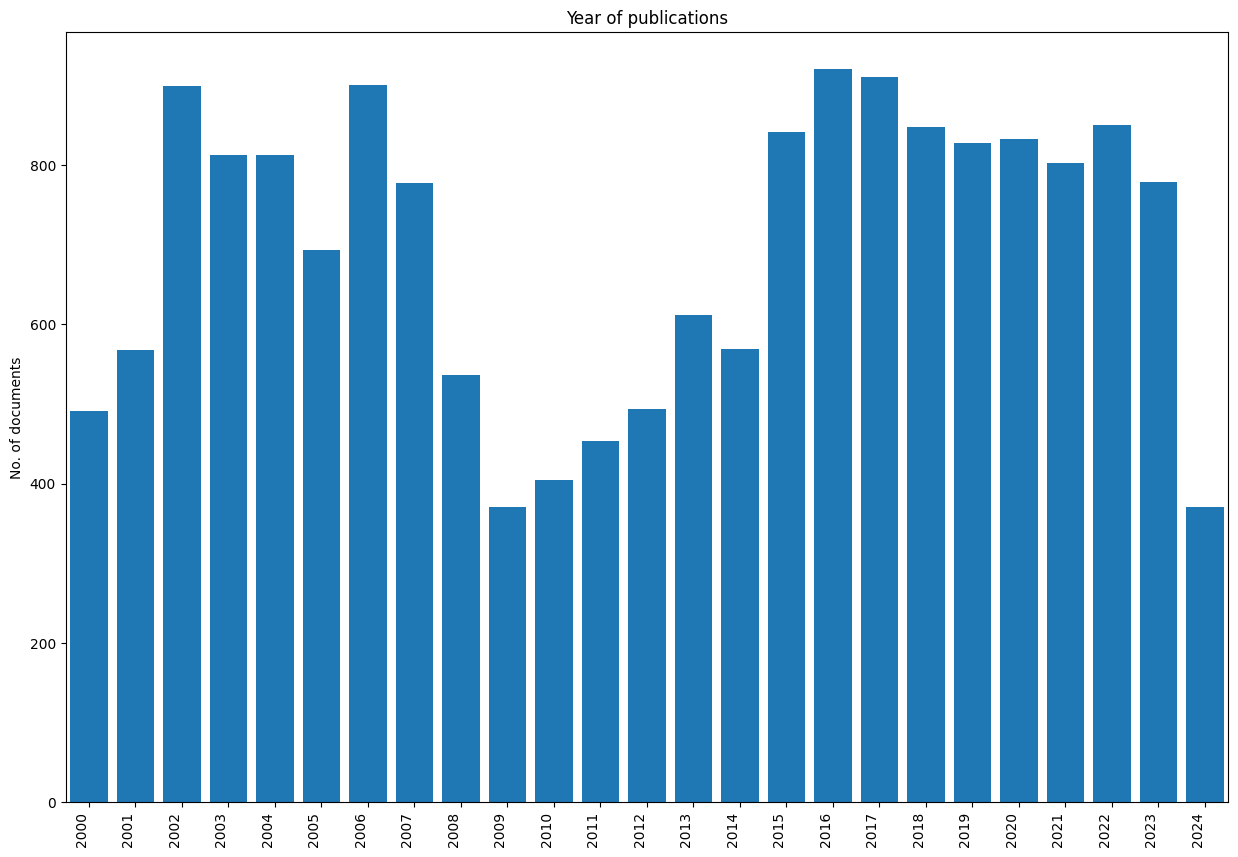

In [33]:
plt.figure(figsize = (15, 10))
litstudy.plot_year_histogram(scopus, vertical=True);

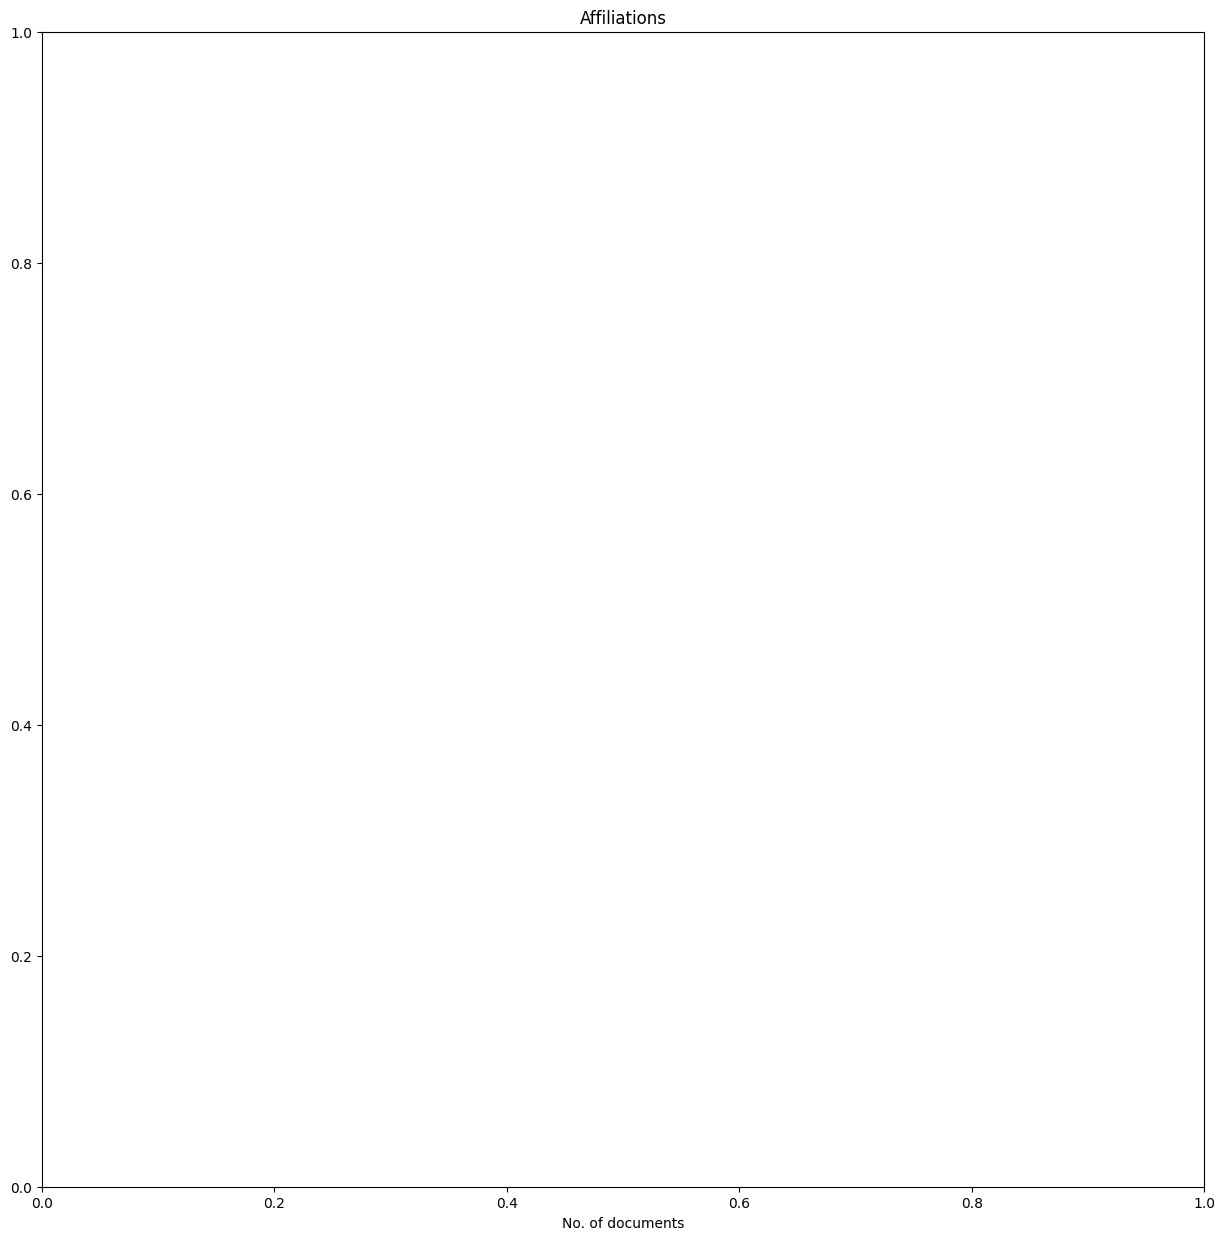

In [32]:
plt.figure(figsize = (15, 15))
litstudy.plot_affiliation_histogram(scopus);

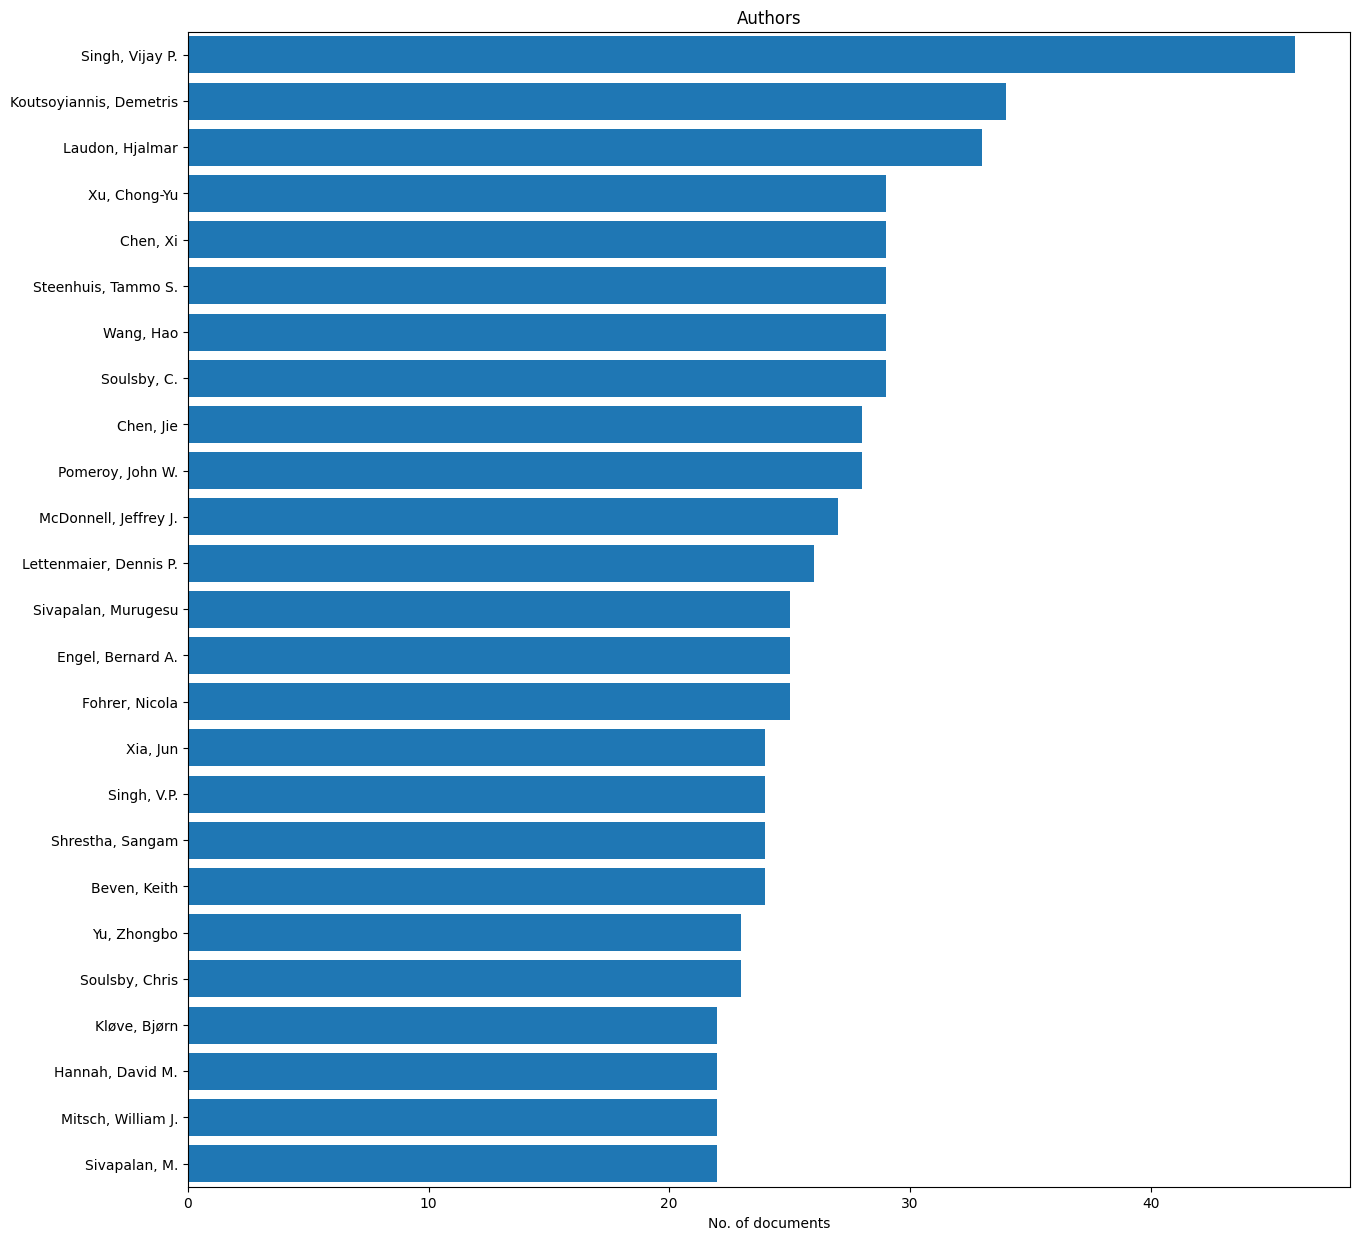

In [31]:
plt.figure(figsize = (15, 15))
litstudy.plot_author_histogram(scopus);

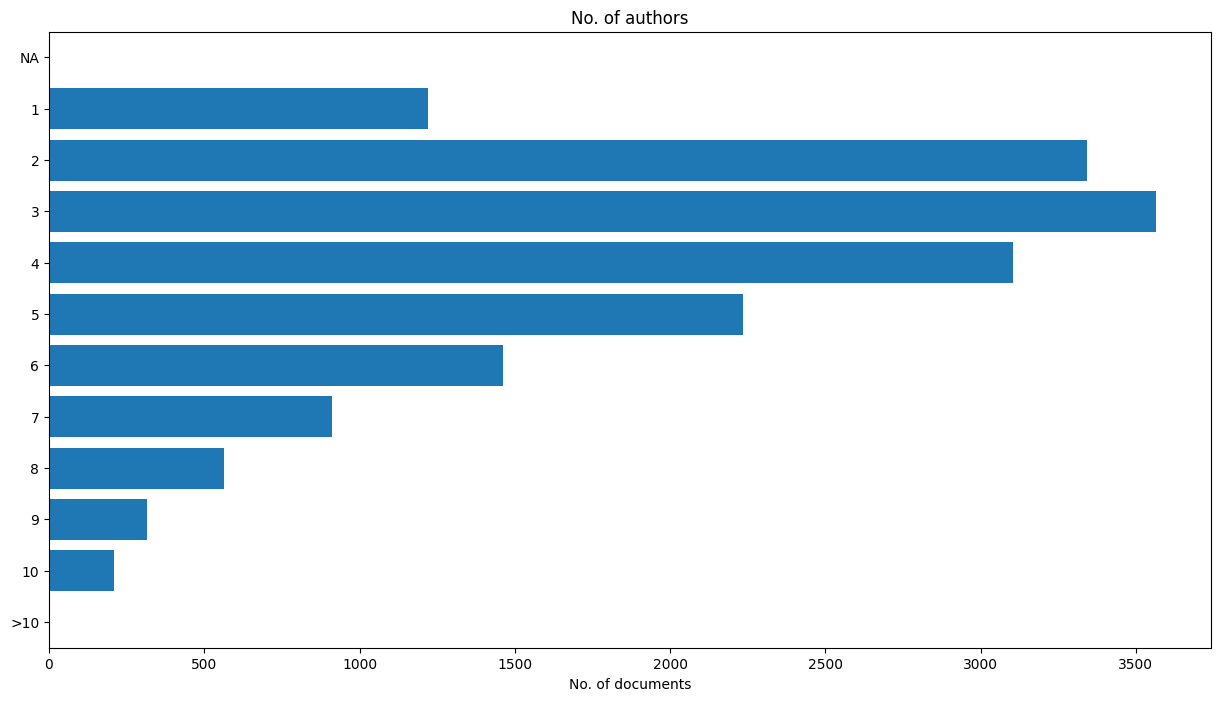

In [30]:
plt.figure(figsize = (15, 8))
litstudy.plot_number_authors_histogram(scopus);

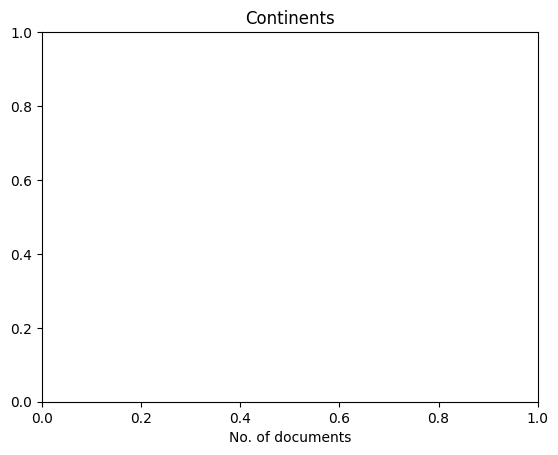

In [29]:
litstudy.plot_continent_histogram(scopus);

In [24]:
litstudy.plot_cocitation_network(scopus, max_edges = 500, node_size = 300)

no edges given


In [25]:
corpus = litstudy.build_corpus(scopus, ngram_threshold=0.8)

In [45]:
litstudy.build_citation_network(scopus)

In [46]:
!pip install elsapy

In [47]:
import elsapy

In [ ]:
elsapy.elsclient()

<Axes: title={'center': 'Publication source'}, xlabel='No. of documents'>

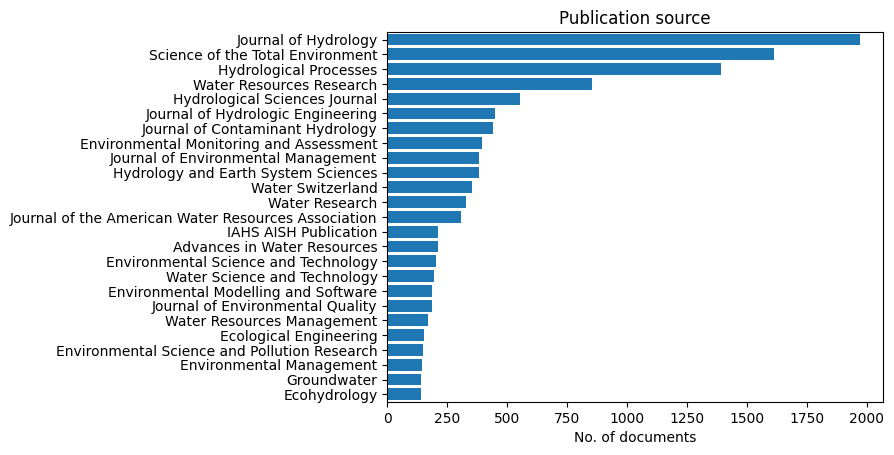

In [36]:
litstudy.plot_source_histogram(scopus)

In [26]:
litstudy.compute_word_distribution(scopus).filter(like='_', axis=0).sort_index()

AttributeError: 'DocumentSet' object has no attribute 'dictionary'

In [27]:
plt.figure(figsize=(20, 3))
litstudy.plot_word_distribution(scopus, limit=50, title="Top words", vertical=True, label_rotation=45);

AttributeError: 'DocumentSet' object has no attribute 'frequencies'

<Figure size 2000x300 with 0 Axes>

In [28]:
num_topics = 15
topic_model = litstudy.train_nmf_model(scopus, num_topics, max_iter = 250)

AttributeError: 'DocumentSet' object has no attribute 'dictionary'

In [ ]:
for i in range(num_topics):
    print(f'Topic {i+1}:', topic_model.best_tokens_for_topic(i))

In [ ]:
plt.figure(figsize=(15, 5))
litstudy.plot_topic_clouds(topic_model, ncols=5);

In [ ]:
plt.figure(figsize=(20, 20))
litstudy.plot_embedding(scopus, topic_model);

In [ ]:
topic_id = topic_model.best_topic_for_token('neural_network')

In [ ]:
for doc_id in topic_model.best_documents_for_topic(topic_id, limit = 20):
    print(docs[int(doc_id)].title)

In [ ]:
threshold = 0.2
dl_topic = topic_model.doc2topic[:, topic_id] > threshold

docs = docs_2000.add_property('dl_topic', dl_topic)


groups = {
    'neural network': 'dl_topic',
    'other': 'not dl_topic',
}

plt.figure(figsize = (15, 10))

litstudy.plot_year_histogram(docs, groups=groups, stacked=True);